C:\ProgramData\Miniconda3\envs\phase_space_reconstruction\lib\site-packages\distgen\generator.py:150: UserWarning: Ignoring user specified t distribution for time start.
  warnings.warn('Ignoring user specified t distribution for time start.')


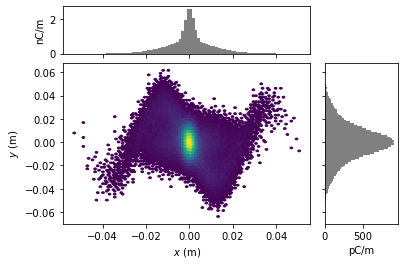

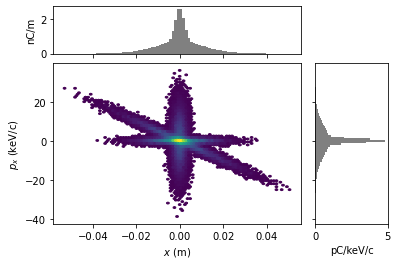

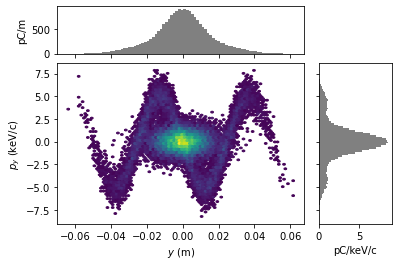

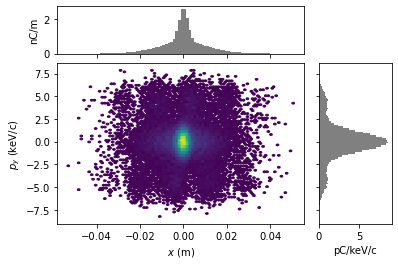

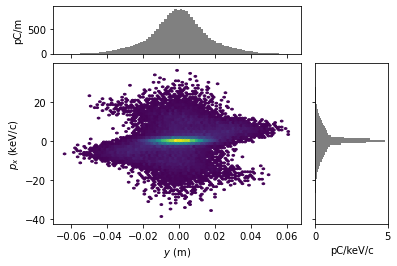

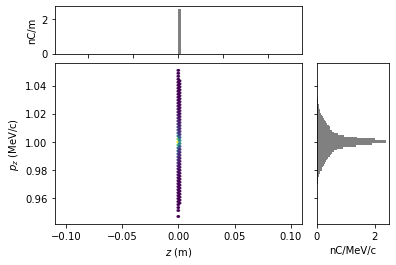

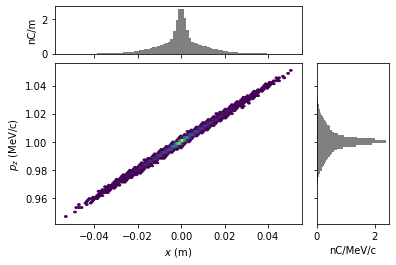

In [3]:
import time
from copy import deepcopy

import matplotlib.pyplot as plt
from distgen import Generator

# create beam
from distgen.physical_constants import unit_registry as unit

from modeling import ImagingModel, NonparametricTransform, train
from visualization import (
    compare_images,
    plot_log_likelihood,
    plot_reconstructed_phase_space,
)

# add a transformation to gen
setstdx = {"type": "set_std x", "sigma_x": {"value": 2, "units": "mm"}}
setstdpx = {"type": "set_std px", "sigma_px": {"value": 0.01, "units": "MeV/c"}}
k = 2 * 3.14 / (50 * unit("mm"))
ycos = {
    "type": "cosine x:y",
    "amplitude": {"value": 30, "units": "mm"},
    "omega": {"value": k.magnitude, "units": str(k.units)},
    "phase": {"value": 90, "units": "deg"},
}

pycos = {
    "type": "cosine y:py",
    "amplitude": {"value": 0.005, "units": "MeV/c"},
    "omega": {"value": k.magnitude, "units": str(k.units)},
    "phase": {"value": 90, "units": "deg"},
}

linear_energy = {
    "type": "polynomial x:pz",
    "coefficients":[
        {"value": 0.0, "units": "MeV/c"},
        {"value": 1.0, "units": "MeV/c/meter"}
    ]
}

gen = Generator("beams/gaussian.yaml")

gen.input["transforms"] = {
    "t1": linear_energy,
    "order": ["t1"]
}

gen.run()
particles_1 = gen.particles



twiss_x = {
    "type": "set_twiss x",
    "beta": {
        "value": 10,
        "units": "m",
    },
    "alpha": {"value": 5, "units": ""},
    "emittance": {"value": 20.0, "units": "um"},
}

# rot2dxxp = {'type':'rotate2d x:xp', 'angle':{'value':45, 'units':'deg'}}

gen.input["transforms"] = {
    "t1": setstdx,
    "t2": setstdpx,
    "t3": linear_energy,
    "order": ["t1", "t2","t3"],
}
gen.run()
particles_2 = gen.particles

gen.input["transforms"] = {
    "twiss": twiss_x,
    "ycos": ycos,
    "pycos": pycos,
    "linear_energy": linear_energy,
    "order": ["twiss", "ycos", "pycos","linear_energy"],
}
gen.run()
particles_3 = gen.particles

particles = particles_1 + particles_2 + particles_3

particles.plot("x", "y")
particles.plot("x", "px")
particles.plot("y", "py")
particles.plot("x", "py")
particles.plot("y", "px")
particles.plot("z", "pz")
particles.plot("x", "pz")


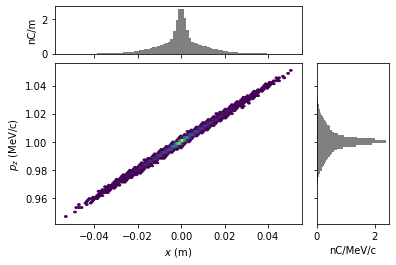

In [4]:
particles.plot("x", "pz")